### runSvmSoftmax

In [3]:
%matplotlib inline

import os
import time
import numpy as np

# Library for plot the output and save to file
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the CIFAR10 dataset
from keras.datasets import cifar10


In [8]:

classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


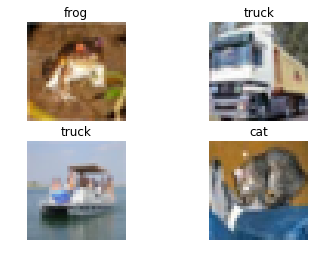

In [13]:

# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(xTrain[0].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0].astype('uint8'))
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(xTest[0].astype('uint8'))
plt.axis('off')
plt.title(classesName[yTest[0]])
#plt.savefig(baseDir+'svm0.png')
plt.show()


In [14]:

# Pre processing data
# Normalize the data by subtract the mean image
meanImage = np.mean(xTrain, axis=0)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

# Reshape data from channel to rows
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1))
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))

# Add bias dimension columns
xTrain = np.hstack([xTrain, np.ones((xTrain.shape[0], 1))])
xVal = np.hstack([xVal, np.ones((xVal.shape[0], 1))])
xTest = np.hstack([xTest, np.ones((xTest.shape[0], 1))])

print ('Train image shape after add bias column:   {0}'.format(xTrain.shape))
print ('Val image shape after add bias column:     {0}'.format(xVal.shape))
print ('Test image shape after add bias column:    {0}'.format(xTest.shape))
print ('\n##############################################################################################')



Train image shape after add bias column:   (49000, 3073)
Val image shape after add bias column:     (1000, 3073)
Test image shape after add bias column:    (10000, 3073)

##############################################################################################


Start training Svm classifier


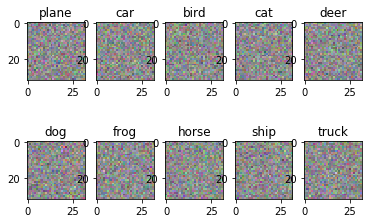

In [19]:
######################################################################################################
#                                       SVM CLASSIFIER                                               #
######################################################################################################
from svm_ayesha import Svm
numClasses = np.max(yTrain) + 1

print ('Start training Svm classifier')

classifier = Svm(xTrain.shape[1], numClasses)

# Show weight for each class before training
if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    #plt.savefig(baseDir+'svm1.png')
    plt.show()


In [20]:

# Training classifier
startTime = time.time()
classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500 ,verbose=True)
print ('Training time: {0}'.format(time.time() - startTime))

# Calculate accuracy (Should get around this)
# Training acc:   37.61%
# Validating acc: 37.0%
# Testing acc:    37.38%
print ('Training acc:   {0}%'.format(classifier.calAccuracy(xTrain, yTrain)))
print ('Validating acc: {0}%'.format(classifier.calAccuracy(xVal, yVal)))
print ('Testing acc:    {0}%'.format(classifier.calAccuracy(xTest, yTest)))


Loop 0 loss 153661.59270634232
Loop 100 loss 20584.14800918024
Loop 200 loss 2755.8522312990203
Loop 300 loss 372.90877474396376
Loop 400 loss 54.617400749134234
Loop 500 loss 12.590982763620755
Loop 600 loss 6.535501713214507
Loop 700 loss 5.30576155806384
Loop 800 loss 5.670988963684194
Loop 900 loss 5.373614127004957
Loop 1000 loss 5.573938981023877
Loop 1100 loss 5.505368574613986
Loop 1200 loss 5.760615326336776
Loop 1300 loss 6.057447877787165
Loop 1400 loss 5.549260915193082
Training time: 9.926442384719849
Training acc:   35.224489795918366%
Validating acc: 36.7%
Testing acc:    35.23%


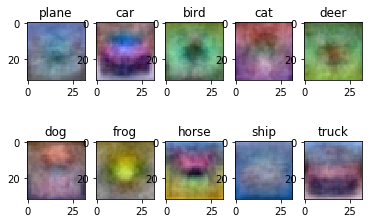

In [21]:

# Show some weight for each class after training
if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        # Scale weight to 0 - 255
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(baseDir+'svm2.png')
    plt.show()

In [ ]:


# Tuneup hyper parameters (regularization strength, learning rate) by using validation data set,
# and random search technique to find the best set of parameters.
learn_rates = [0.5e-7, 1e-7, 2e-7, 6e-7]
reg_strengths = [500,5000,18000]
bestParameters = [0, 0]
bestAcc = -1
bestModel = None
print ('\nFinding best model for Svm classifier')

################################################################################
# TODO: 5 points                                                               #
# Tuneup hyper parameters by using validation set.                             #
# - Store the best variables in parameters                                     #
# - Store the best model in bestSoftmax                                        #
# - Store the best accuracy in bestAcc                                         #
################################################################################
for rs in reg_strengths:
    for lr in learn_rates:
        #print(str(lr)+"     "+str(rs))
        classifier = Svm(xTrain.shape[1], numClasses)
        classifier.train(xTrain, yTrain, lr, rs, iter=1500 ,verbose=False)
        valAcc = classifier.calAccuracy(xVal, yVal)
        if valAcc > bestAcc:
            bestAcc = valAcc
            bestModel = classifier
        bestParameters = [lr,rs]

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
print ('Best validation accuracy: {0}'.format(bestAcc))

# Predict with best model
if bestModel is not None:
    print ('Best Model parameter, lr = {0}, reg = {1}'.format(bestParameters[0], bestParameters[1]))
    print ('Training acc:   {0}%'.format(bestModel.calAccuracy(xTrain, yTrain)))
    print ('Validating acc: {0}%'.format(bestModel.calAccuracy(xVal, yVal)))
    print ('Testing acc:    {0}%'.format(bestModel.calAccuracy(xTest, yTest)))
print ('\n##############################################################################################')
######################################################################################################
#                                END OF SVM CLASSIFIER                                               #
######################################################################################################

######################################################################################################
#                                       SOFTMAX CLASSIFIER                                           #
######################################################################################################
from softmax import Softmax
numClasses = np.max(yTrain) + 1
print ('Start training Softmax classifier')
classifier = Softmax(xTrain.shape[1], numClasses)

# Show weight for each class before training
if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(baseDir+'softmax1.png')
    plt.clf()

# Training classifier
startTime = time.time()
classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500 ,verbose=True)
print ('Training time: {0}'.format(time.time() - startTime))

# Calculate accuracy (Should get around this)
# Training acc:   33.03%
# Validating acc: 33.7%
# Testing acc:    33.12%
print ('Training acc:   {0}%'.format(classifier.calAccuracy(xTrain, yTrain)))
print ('Validating acc: {0}%'.format(classifier.calAccuracy(xVal, yVal)))
print ('Testing acc:    {0}%'.format(classifier.calAccuracy(xTest, yTest)))

# Show some weight for each class after training
if classifier.W is not None:
    tmpW = classifier.W[:-1, :]
    tmpW = tmpW.reshape(32, 32, 3, 10)
    tmpWMin, tmpWMax = np.min(tmpW), np.max(tmpW)
    for i in range(numClasses):
        plt.subplot(2, 5, i+1)
        plt.title(classesName[i])
        # Range 0 - 255
        wPlot = 255.0 * (tmpW[:, :, :, i].squeeze() - tmpWMin) / (tmpWMax - tmpWMin)
        plt.imshow(wPlot.astype('uint8'))
    plt.savefig(baseDir+'softmax2.png')
    plt.clf()

# Tuneup hyper parameters (regularization strength, learning rate) by using validation data set,
# and random search technique to find the best set of parameters.
learn_rates = [0.5e-7,4e-7, 8e-7]
reg_strengths = [ 500,1500,7500,12000]
bestParameters = [0, 0]
bestAcc = -1
bestModel = None
print ('\nFinding best model for Softmax classifier')
################################################################################
# TODO: 5 points                                                               #
# Tuneup hyper parameters by using validation set.                             #
# - Store the best variables in parameters                                     #
# - Store the best model in bestSoftmax                                        #
# - Store the best accuracy in bestAcc                                         #
################################################################################
for rs in reg_strengths:
    for lr in learn_rates:
        classifier = Softmax(xTrain.shape[1], numClasses)
        classifier.train(xTrain, yTrain, lr, rs, iter=1500 ,verbose=False)
        valAcc = classifier.calAccuracy(xVal, yVal)
        if valAcc > bestAcc:
            bestAcc = valAcc
            bestModel = classifier
        bestParameters = [lr,rs]

################################################################################
#                              END OF YOUR CODE                                #
################################################################################
print ('Best validation accuracy: {0}'.format(bestAcc))

# Predict with best model
if bestModel is not None:
    print ('Best Model parameter, lr = {0}, reg = {1}'.format(bestParameters[0], bestParameters[1]))
    print ('Training acc:   {0}%'.format(bestModel.calAccuracy(xTrain, yTrain)))
    print ('Validating acc: {0}%'.format(bestModel.calAccuracy(xVal, yVal)))
    print ('Testing acc:    {0}%'.format(bestModel.calAccuracy(xTest, yTest)))
######################################################################################################
#                                END OF SOFTMAX CLASSIFIER                                           #